<a href="https://colab.research.google.com/github/shunsuketama/Shintama/blob/main/%E8%B5%A4%E3%83%A9%E3%82%A4%E3%83%B3%E3%81%BE%E3%81%A7%E5%BC%95%E3%81%91%E3%81%9F%E3%82%84%E3%81%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab へようこそ

In [ ]:
import torch
import torchvision
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
torch.cuda.is_available()


True

In [ ]:
import cv2
print(cv2.__version__)


4.12.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
from pathlib import Path

DIR = Path("/content/drive/MyDrive/nv_detection_project/raw_data/annotated")

for p in DIR.iterdir():
    if not p.is_file():
        continue

    # 例: 1-10385045L.tif
    name = p.stem      # "1-10385045L"
    ext  = p.suffix    # ".tif"

    if "-" not in name:
        print("スキップ（'-'なし）:", p.name)
        continue

    left, right = name.split("-", 1)
    new_name = f"{right}-{left}{ext}"

    new_path = p.with_name(new_name)

    print(f"{p.name}  →  {new_name}")
    p.rename(new_path)

print("リネーム完了")


2-10794878.jpg  →  10794878-2.jpg
8-10385045R.tif  →  10385045R-8.tif
9-10385045R.tif  →  10385045R-9.tif
20-10385045R.tif  →  10385045R-20.tif
19-10385045R.tif  →  10385045R-19.tif
17-10385045R.tif  →  10385045R-17.tif
13-10385045R.tif  →  10385045R-13.tif
1-10385045R.tif  →  10385045R-1.tif
5-10385045R.tif  →  10385045R-5.tif
2-10385045R.tif  →  10385045R-2.tif
6-10385045R.tif  →  10385045R-6.tif
14-10385045R.tif  →  10385045R-14.tif
10-10385045R.tif  →  10385045R-10.tif
12-10385045L.tif  →  10385045L-12.tif
15-10385045L.tif  →  10385045L-15.tif
16-10385045L.tif  →  10385045L-16.tif
4-10385045L.tif  →  10385045L-4.tif
7-10385045R.tif  →  10385045R-7.tif
3-10385045R.tif  →  10385045R-3.tif
11-10385045R.tif  →  10385045R-11.tif
15-10385045R.tif  →  10385045R-15.tif
12-10385045R.tif  →  10385045R-12.tif
16-10385045R.tif  →  10385045R-16.tif
4-10385045R.tif  →  10385045R-4.tif
18-10385045R.tif  →  10385045R-18.tif
19-10385045L.tif  →  10385045L-19.tif
18-10385045L.tif  →  10385045L-18.ti

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
from pathlib import Path

DIR = Path("/content/drive/MyDrive/nv_detection_project/raw_data/original")

for p in DIR.iterdir():
    if not p.is_file():
        continue

    # 例: 1-10385045L.tif
    name = p.stem      # "1-10385045L"
    ext  = p.suffix    # ".tif"

    if "-" not in name:
        print("スキップ（'-'なし）:", p.name)
        continue

    left, right = name.split("-", 1)
    new_name = f"{right}-{left}{ext}"

    new_path = p.with_name(new_name)

    print(f"{p.name}  →  {new_name}")
    p.rename(new_path)

print("リネーム完了")


1-11846715.jpg  →  11846715-1.jpg
2-11846715.jpg  →  11846715-2.jpg
3-11846715.jpg  →  11846715-3.jpg
4-11846715.jpg  →  11846715-4.jpg
5-11846715.jpg  →  11846715-5.jpg
6-11846715.jpg  →  11846715-6.jpg
7-11846715.jpg  →  11846715-7.jpg
8-11846715.jpg  →  11846715-8.jpg
9-11846715.jpg  →  11846715-9.jpg
10-11846715.jpg  →  11846715-10.jpg
11-11846715.jpg  →  11846715-11.jpg
12-11846715.jpg  →  11846715-12.jpg
13-11846715.jpg  →  11846715-13.jpg
14-11846715.jpg  →  11846715-14.jpg
15-11846715.jpg  →  11846715-15.jpg
16-11846715.jpg  →  11846715-16.jpg
17-11846715.jpg  →  11846715-17.jpg
18-11846715.jpg  →  11846715-18.jpg
19-11846715.jpg  →  11846715-19.jpg
20-11846715.jpg  →  11846715-20.jpg
21-11846715.jpg  →  11846715-21.jpg
22-11846715.jpg  →  11846715-22.jpg
32-11846715.jpg  →  11846715-32.jpg
33-11846715.jpg  →  11846715-33.jpg
34-11846715.jpg  →  11846715-34.jpg
35-11846715.jpg  →  11846715-35.jpg
36-11846715.jpg  →  11846715-36.jpg
37-11846715.jpg  →  11846715-37.jpg
38-1184671

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import random
from collections import defaultdict

# ディレクトリ
base_dir = "/content/drive/MyDrive/nv_detection_project/processed/images_512"
train_dir = "/content/drive/MyDrive/nv_detection_project/processed/images_512_trainval/train"
val_dir = "/content/drive/MyDrive/nv_detection_project/processed/images_512_trainval/val"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# ファイル一覧取得
file_list = [f for f in os.listdir(base_dir) if f.endswith(".png")]

# 患者ごとに画像をまとめる
pid_dict = defaultdict(list)
for fname in file_list:
    pid = fname.split("-")[0]
    pid_dict[pid].append(fname)

total_imgs = len(file_list)
target_train = int(total_imgs * 0.8)

print(f"Total images = {total_imgs}")
print(f"Train target = {target_train}")

# 患者ID＋画像枚数セットをランダムに並べる
items = list(pid_dict.items())
random.seed(42)
random.shuffle(items)

train_ids = set()
train_count = 0

# 患者単位で積み上げていく
for pid, imgs in items:
    if train_count + len(imgs) <= target_train:
        train_ids.add(pid)
        train_count += len(imgs)

print(f"Assigned to train = {train_count} images")
print(f"Train patients = {len(train_ids)}")

# コピー実行
for fname in file_list:
    pid = fname.split("-")[0]
    src = os.path.join(base_dir, fname)
    if pid in train_ids:
        dst = os.path.join(train_dir, fname)
    else:
        dst = os.path.join(val_dir, fname)
    shutil.copy2(src, dst)

print("Done! Randomized patient-locked 8:2 split completed.")


Total images = 145
Train target = 116
Assigned to train = 95 images
Train patients = 4
Done! Randomized patient-locked 8:2 split completed.


In [ ]:
import os
import shutil
import random
from collections import defaultdict

# ====== パス設定 ======
# 画像
base_dir_img = "/content/drive/MyDrive/nv_detection_project/processed/images_512"
train_img_dir = "/content/drive/MyDrive/nv_detection_project/processed/images_512_trainval/train"
val_img_dir   = "/content/drive/MyDrive/nv_detection_project/processed/images_512_trainval/val"

# マスク
base_dir_mask = "/content/drive/MyDrive/nv_detection_project/processed/masks_512"
train_mask_dir = "/content/drive/MyDrive/nv_detection_project/processed/masks_512_trainval/train"
val_mask_dir   = "/content/drive/MyDrive/nv_detection_project/processed/masks_512_trainval/val"

# 出力ディレクトリ作成
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_mask_dir, exist_ok=True)
os.makedirs(val_mask_dir, exist_ok=True)

# ====== 画像ファイル一覧（これを基準に分割） ======
img_files = [f for f in os.listdir(base_dir_img) if f.endswith(".png")]

# 患者ごとに画像をまとめる
pid_dict = defaultdict(list)
for fname in img_files:
    pid = fname.split("-")[0]   # ハイフン前が患者ID
    pid_dict[pid].append(fname)

total_imgs = len(img_files)
target_train = int(total_imgs * 0.8)

print(f"Total images = {total_imgs}")
print(f"Train target = {target_train}")

# 患者ID＋画像リストをランダムに並べる
items = list(pid_dict.items())
random.seed(42)   # 再現性
random.shuffle(items)

train_ids = set()
train_count = 0

# 患者単位で積み上げて 8割を目指す
for pid, imgs in items:
    if train_count + len(imgs) <= target_train:
        train_ids.add(pid)
        train_count += len(imgs)

print(f"Assigned to train = {train_count} images")
print(f"Train patients    = {len(train_ids)}")

# ====== 画像＆マスクを同じルールでコピー ======
missing_masks = []

for fname in img_files:
    pid = fname.split("-")[0]

    # 画像のコピー
    src_img = os.path.join(base_dir_img, fname)
    if pid in train_ids:
        dst_img = os.path.join(train_img_dir, fname)
        dst_mask = os.path.join(train_mask_dir, fname)
    else:
        dst_img = os.path.join(val_img_dir, fname)
        dst_mask = os.path.join(val_mask_dir, fname)

    shutil.copy2(src_img, dst_img)

    # マスクのコピー（ファイル名が同じ想定）
    src_mask = os.path.join(base_dir_mask, fname)
    if os.path.exists(src_mask):
        shutil.copy2(src_mask, dst_mask)
    else:
        missing_masks.append(fname)

print("Done! Randomized patient-locked 8:2 split for images & masks.")

if missing_masks:
    print("⚠ マスクが見つからなかったファイル一覧:")
    for f in missing_masks:
        print("  ", f)


Total images = 145
Train target = 116
Assigned to train = 95 images
Train patients    = 4
Done! Randomized patient-locked 8:2 split for images & masks.


In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import random
import matplotlib.pyplot as plt


In [ ]:
class OCTDataset(Dataset):
    def __init__(self, image_dir, mask_dir, augment=False,
                 ensure_size=None):
        """
        image_dir: 画像フォルダ（train か val）
        mask_dir : マスクフォルダ（train か val）
        augment  : Data Augmentation を使うかどうか
        ensure_size: (W, H) のタプル。例 (512, 512)
                     None の場合はリサイズしない
        """
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.augment = augment
        self.ensure_size = ensure_size

        # 画像ファイル一覧（マスクも同名で存在すると仮定）
        self.image_files = sorted([
            f for f in os.listdir(image_dir)
            if f.endswith(".png")
        ])

        # Tensor 変換（[0,255] → [0,1] & (C,H,W)）
        self.to_tensor = T.ToTensor()

        # ColorJitter（輝度・コントラスト；画像のみ）
        self.color_jitter = T.ColorJitter(
            brightness=0.2,
            contrast=0.2
        )

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]

        # パス作成
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name)

        # グレースケールで読み込み（1ch）
        image = Image.open(img_path).convert("L")
        mask  = Image.open(mask_path).convert("L")

        # 必要ならサイズを強制（例：512×512）
        if self.ensure_size is not None:
            w, h = self.ensure_size  # (W, H)
            image = image.resize((w, h), resample=Image.BILINEAR)
            mask  = mask.resize((w, h), resample=Image.NEAREST)

        # ---------- Data Augmentation ----------
        if self.augment:
            # 1) 左右反転（RandomHorizontalFlip 相当）
            if random.random() < 0.5:
                image = TF.hflip(image)
                mask  = TF.hflip(mask)

            # 2) 回転（RandomRotation ±10度 相当）
            angle = random.uniform(-10, 10)
            # ここは PIL の rotate を使う（バージョン依存しないので安全）
            image = image.rotate(angle, resample=Image.BILINEAR)
            mask  = mask.rotate(angle,  resample=Image.NEAREST)

            # 3) ColorJitter（画像のみ）
            image = self.color_jitter(image)

        # ---------- Tensor 化（[0,1], (C,H,W)） ----------
        image = self.to_tensor(image)  # (1, H, W)
        mask  = self.to_tensor(mask)   # (1, H, W)

        # マスクを 0/1 に揃える（補間の影響を消す）
        mask = (mask > 0.5).float()

        return image, mask

In [ ]:
# === パス ===
base_path = "/content/drive/MyDrive/nv_detection_project/processed"

train_img_dir  = os.path.join(base_path, "images_512_trainval", "train")
train_mask_dir = os.path.join(base_path, "masks_512_trainval", "train")

val_img_dir  = os.path.join(base_path, "images_512_trainval", "val")
val_mask_dir = os.path.join(base_path, "masks_512_trainval", "val")

# === Dataset 作成 ===
# 512×512 に揃える場合は ensure_size=(512,512)
train_dataset = OCTDataset(
    train_img_dir,
    train_mask_dir,
    augment=True,
    ensure_size=(512, 512)   # 512×512 前提の場合
)

val_dataset = OCTDataset(
    val_img_dir,
    val_mask_dir,
    augment=False,            # val では基本 augmentation しない
    ensure_size=(512, 512)
)

# === DataLoader 作成 ===
train_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)


In [ ]:
train_dataset[10]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
class DoubleConv(nn.Module):
    """Conv2d → BN → ReLU を2回（U-Netの基本ブロック）"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """MaxPool でダウンサンプル → DoubleConv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.block(x)


class Up(nn.Module):
    """アップサンプル（ConvTranspose2d）→ skip connection と concat → DoubleConv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()

        # in_channels は upsample 前のチャネル数
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
        # concat 後のチャネル数 = out_channels (from up) + skip_channels
        self.conv = DoubleConv(in_channels, out_channels)  # in_channels = out_channels + skip_channels

    def forward(self, x1, x2):
        """
        x1: decoder側の特徴（小さいやつ）
        x2: encoder側のskip接続（大きいサイズ）
        """
        x1 = self.up(x1)  # アップサンプル

        # 形が合わない場合の調整（今回512→256→...→32なので基本ズレない）
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        if diffY != 0 or diffX != 0:
            x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                            diffY // 2, diffY - diffY // 2])

        # skip connection: チャネル方向に結合
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    """最後の1x1 conv でチャネル1に落とす（logits出力）"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


In [ ]:
class UNet(nn.Module):
    def __init__(self, n_channels=1, n_classes=1):
        super().__init__()
        self.inc   = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 1024)

        self.up1 = Up(1024, 512)
        self.up2 = Up(512, 256)
        self.up3 = Up(256, 128)
        self.up4 = Up(128, 64)

        self.outc = OutConv(64, n_classes)  # n_classes=1 → 1chのlogits

    def forward(self, x):
        # Encoder
        x1 = self.inc(x)      # (N, 64, 512, 512)
        x2 = self.down1(x1)   # (N, 128, 256, 256)
        x3 = self.down2(x2)   # (N, 256, 128, 128)
        x4 = self.down3(x3)   # (N, 512, 64, 64)
        x5 = self.down4(x4)   # (N, 1024, 32, 32)

        # Decoder + skip
        x = self.up1(x5, x4)  # (N, 512, 64, 64)
        x = self.up2(x,  x3)  # (N, 256, 128, 128)
        x = self.up3(x,  x2)  # (N, 128, 256, 256)
        x = self.up4(x,  x1)  # (N, 64,  512, 512)

        logits = self.outc(x)  # (N, 1, 512, 512)
        return logits


In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super().__init__()
        self.smooth = smooth

    def forward(self, logits, targets):
        """
        logits: (N, 1, H, W)  シグモイド前
        targets: (N, 1, H, W) 0 or 1
        """
        probs = torch.sigmoid(logits)

        # flatten
        probs_flat   = probs.contiguous().view(probs.shape[0], -1)
        targets_flat = targets.contiguous().view(targets.shape[0], -1)

        intersection = (probs_flat * targets_flat).sum(dim=1)
        union = probs_flat.sum(dim=1) + targets_flat.sum(dim=1)

        dice = (2. * intersection + self.smooth) / (union + self.smooth)

        # バッチ平均のDice Loss
        return 1. - dice.mean()


In [ ]:
class BCEDiceLoss(nn.Module):
    def __init__(self, bce_weight=0.5, dice_weight=0.5):
        super().__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss()
        self.bce_weight = bce_weight
        self.dice_weight = dice_weight

    def forward(self, logits, targets):
        loss_bce  = self.bce(logits, targets)
        loss_dice = self.dice(logits, targets)
        loss = self.bce_weight * loss_bce + self.dice_weight * loss_dice
        return loss, loss_bce, loss_dice


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_channels=1, n_classes=1).to(device)
criterion = BCEDiceLoss(bce_weight=0.5, dice_weight=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 1イテレーションだけ例
model.train()
for images, masks in train_loader:
    images = images.to(device)           # (N, 1, 512, 512)
    masks  = masks.to(device)           # (N, 1, 512, 512)

    optimizer.zero_grad()

    logits = model(images)              # (N, 1, 512, 512)
    loss, loss_bce, loss_dice = criterion(logits, masks)

    loss.backward()
    optimizer.step()

    print(f"loss={loss.item():.4f}, bce={loss_bce.item():.4f}, dice_loss={loss_dice.item():.4f}")
    break


loss=0.5520, bce=0.6854, dice_loss=0.4186


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

# ===== すでにある部分 =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_channels=1, n_classes=1).to(device)
criterion = BCEDiceLoss(bce_weight=0.5, dice_weight=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ===== Dice係数を計算する関数（メトリクス用） =====
def dice_coef(preds, targets, eps=1e-7):
    """
    preds: (N, 1, H, W) after sigmoid & threshold
    targets: (N, 1, H, W)
    """
    preds = preds.view(preds.size(0), -1)
    targets = targets.view(targets.size(0), -1)

    intersection = (preds * targets).sum(dim=1)
    union = preds.sum(dim=1) + targets.sum(dim=1)

    dice = (2.0 * intersection + eps) / (union + eps)
    return dice.mean()

# ===== 学習ループ (Step 8) =====
num_epochs = 80  # 目安: 50〜100
best_val_loss = np.inf
save_path = "/content/drive/MyDrive/nv_detection_project/models"

for epoch in range(1, num_epochs + 1):
    # --------------------
    # Train
    # --------------------
    model.train()
    train_loss_sum = 0.0
    train_bce_sum = 0.0
    train_dice_loss_sum = 0.0
    train_dice_metric_sum = 0.0
    n_train_batches = 0

    for images, masks in train_loader:
        images = images.to(device)   # (N, 1, 512, 512)
        masks  = masks.to(device)   # (N, 1, 512, 512)

        optimizer.zero_grad()

        logits = model(images)      # (N, 1, 512, 512)
        loss, loss_bce, loss_dice = criterion(logits, masks)

        loss.backward()
        optimizer.step()

        # メトリクス用にDice係数を計算（predは0/1）
        with torch.no_grad():
            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()
            dice_metric = dice_coef(preds, masks)

        train_loss_sum      += loss.item()
        train_bce_sum       += loss_bce.item()
        train_dice_loss_sum += loss_dice.item()
        train_dice_metric_sum += dice_metric.item()
        n_train_batches += 1

    train_loss      = train_loss_sum / n_train_batches
    train_bce       = train_bce_sum / n_train_batches
    train_dice_loss = train_dice_loss_sum / n_train_batches
    train_dice_metric = train_dice_metric_sum / n_train_batches

    # --------------------
    # Validation
    # --------------------
    model.eval()
    val_loss_sum = 0.0
    val_bce_sum = 0.0
    val_dice_loss_sum = 0.0
    val_dice_metric_sum = 0.0
    n_val_batches = 0

    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks  = masks.to(device)

            logits = model(images)
            loss, loss_bce, loss_dice = criterion(logits, masks)

            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()
            dice_metric = dice_coef(preds, masks)

            val_loss_sum      += loss.item()
            val_bce_sum       += loss_bce.item()
            val_dice_loss_sum += loss_dice.item()
            val_dice_metric_sum += dice_metric.item()
            n_val_batches += 1

    val_loss      = val_loss_sum / n_val_batches
    val_bce       = val_bce_sum / n_val_batches
    val_dice_loss = val_dice_loss_sum / n_val_batches
    val_dice_metric = val_dice_metric_sum / n_val_batches

    # --------------------
    # ログ表示
    # --------------------
    print(f"[Epoch {epoch:03d}/{num_epochs}] "
          f"Train: loss={train_loss:.4f} (bce={train_bce:.4f}, dice_loss={train_dice_loss:.4f}, dice={train_dice_metric:.4f}) | "
          f"Val: loss={val_loss:.4f} (bce={val_bce:.4f}, dice_loss={val_dice_loss:.4f}, dice={val_dice_metric:.4f})")

    # --------------------
    # ベストモデルの保存（val_lossが最小）
    # --------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), save_path)
        print(f"  -> Best model updated! (saved to {save_path})")


[Epoch 001/80] Train: loss=0.4314 (bce=0.5232, dice_loss=0.3395, dice=0.7032) | Val: loss=0.4780 (bce=0.6170, dice_loss=0.3389, dice=0.6639)


RuntimeError: File /content/drive/MyDrive/nv_detection_project/models cannot be opened.

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

# ===== すでにある部分 =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_channels=1, n_classes=1).to(device)
criterion = BCEDiceLoss(bce_weight=0.5, dice_weight=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ===== Dice係数を計算する関数（メトリクス用） =====
def dice_coef(preds, targets, eps=1e-7):
    """
    preds: (N, 1, H, W) after sigmoid & threshold
    targets: (N, 1, H, W)
    """
    preds = preds.view(preds.size(0), -1)
    targets = targets.view(targets.size(0), -1)

    intersection = (preds * targets).sum(dim=1)
    union = preds.sum(dim=1) + targets.sum(dim=1)

    dice = (2.0 * intersection + eps) / (union + eps)
    return dice.mean()

# ===== 学習ループ (Step 8) =====
num_epochs = 80  # 目安: 50〜100
best_val_loss = np.inf
save_path = "/content/drive/MyDrive/nv_detection_project/models/u-net.pth"

for epoch in range(1, num_epochs + 1):
    # --------------------
    # Train
    # --------------------
    model.train()
    train_loss_sum = 0.0
    train_bce_sum = 0.0
    train_dice_loss_sum = 0.0
    train_dice_metric_sum = 0.0
    n_train_batches = 0

    for images, masks in train_loader:
        images = images.to(device)   # (N, 1, 512, 512)
        masks  = masks.to(device)   # (N, 1, 512, 512)

        optimizer.zero_grad()

        logits = model(images)      # (N, 1, 512, 512)
        loss, loss_bce, loss_dice = criterion(logits, masks)

        loss.backward()
        optimizer.step()

        # メトリクス用にDice係数を計算（predは0/1）
        with torch.no_grad():
            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()
            dice_metric = dice_coef(preds, masks)

        train_loss_sum      += loss.item()
        train_bce_sum       += loss_bce.item()
        train_dice_loss_sum += loss_dice.item()
        train_dice_metric_sum += dice_metric.item()
        n_train_batches += 1

    train_loss      = train_loss_sum / n_train_batches
    train_bce       = train_bce_sum / n_train_batches
    train_dice_loss = train_dice_loss_sum / n_train_batches
    train_dice_metric = train_dice_metric_sum / n_train_batches

    # --------------------
    # Validation
    # --------------------
    model.eval()
    val_loss_sum = 0.0
    val_bce_sum = 0.0
    val_dice_loss_sum = 0.0
    val_dice_metric_sum = 0.0
    n_val_batches = 0

    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks  = masks.to(device)

            logits = model(images)
            loss, loss_bce, loss_dice = criterion(logits, masks)

            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()
            dice_metric = dice_coef(preds, masks)

            val_loss_sum      += loss.item()
            val_bce_sum       += loss_bce.item()
            val_dice_loss_sum += loss_dice.item()
            val_dice_metric_sum += dice_metric.item()
            n_val_batches += 1

    val_loss      = val_loss_sum / n_val_batches
    val_bce       = val_bce_sum / n_val_batches
    val_dice_loss = val_dice_loss_sum / n_val_batches
    val_dice_metric = val_dice_metric_sum / n_val_batches

    # --------------------
    # ログ表示
    # --------------------
    print(f"[Epoch {epoch:03d}/{num_epochs}] "
          f"Train: loss={train_loss:.4f} (bce={train_bce:.4f}, dice_loss={train_dice_loss:.4f}, dice={train_dice_metric:.4f}) | "
          f"Val: loss={val_loss:.4f} (bce={val_bce:.4f}, dice_loss={val_dice_loss:.4f}, dice={val_dice_metric:.4f})")

    # --------------------
    # ベストモデルの保存（val_lossが最小）
    # --------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), save_path)
        print(f"  -> Best model updated! (saved to {save_path})")


[Epoch 001/80] Train: loss=0.4245 (bce=0.5125, dice_loss=0.3364, dice=0.7411) | Val: loss=0.4311 (bce=0.5615, dice_loss=0.3008, dice=0.9087)
  -> Best model updated! (saved to /content/drive/MyDrive/nv_detection_project/models/u-net.pth)
[Epoch 002/80] Train: loss=0.2727 (bce=0.3292, dice_loss=0.2163, dice=0.9102) | Val: loss=0.1945 (bce=0.2481, dice_loss=0.1408, dice=0.9814)
  -> Best model updated! (saved to /content/drive/MyDrive/nv_detection_project/models/u-net.pth)
[Epoch 003/80] Train: loss=0.2346 (bce=0.2847, dice_loss=0.1846, dice=0.9252) | Val: loss=0.1568 (bce=0.2033, dice_loss=0.1103, dice=0.9771)
  -> Best model updated! (saved to /content/drive/MyDrive/nv_detection_project/models/u-net.pth)
[Epoch 004/80] Train: loss=0.2083 (bce=0.2509, dice_loss=0.1657, dice=0.9379) | Val: loss=0.1426 (bce=0.1858, dice_loss=0.0995, dice=0.9807)
  -> Best model updated! (saved to /content/drive/MyDrive/nv_detection_project/models/u-net.pth)
[Epoch 005/80] Train: loss=0.1833 (bce=0.2201, d

[Step 9] Skeleton Dice on Val = 0.4122


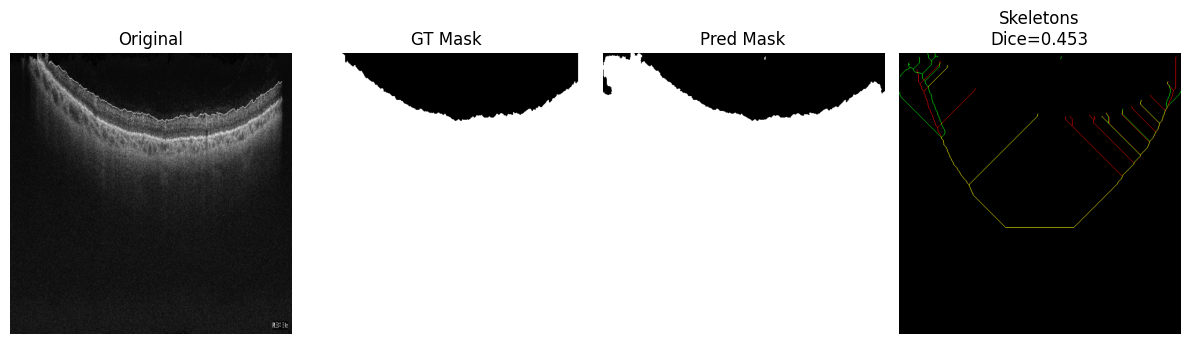

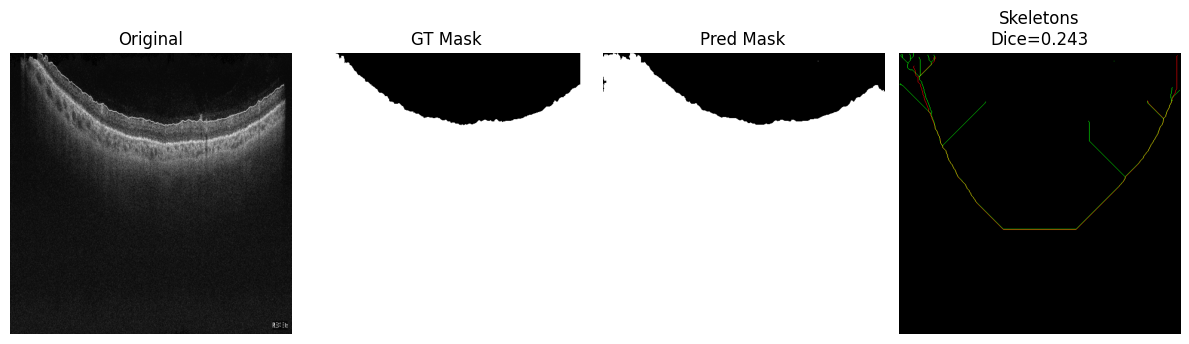

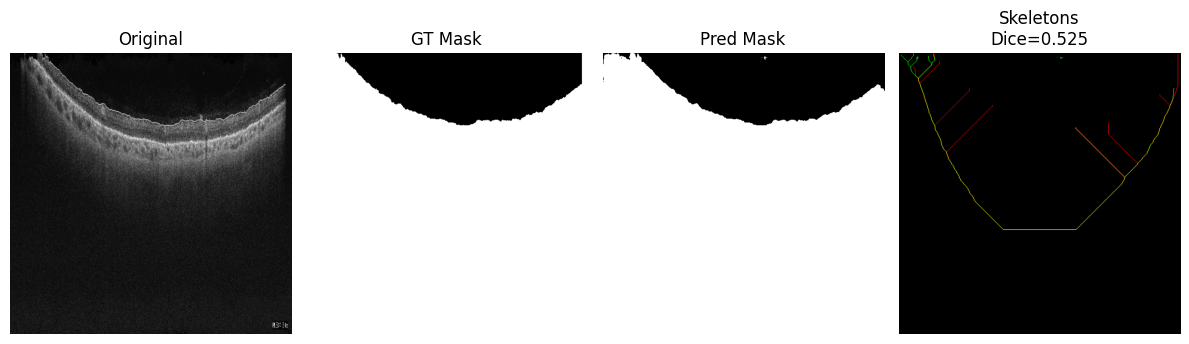

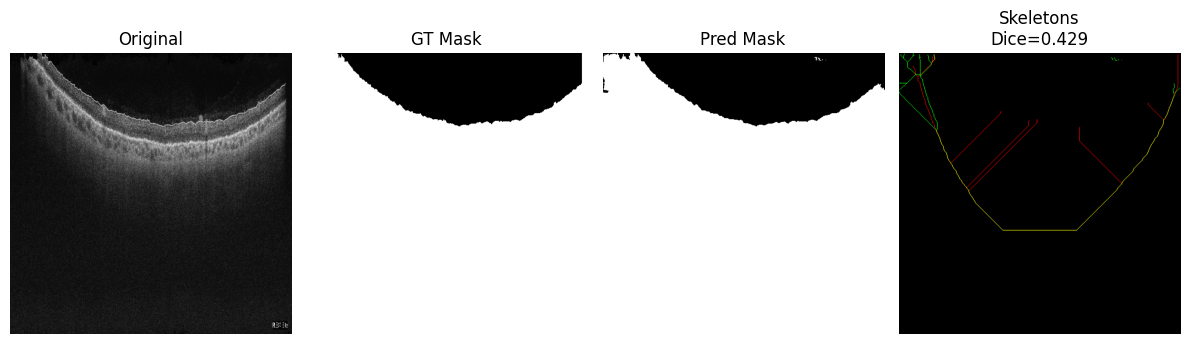

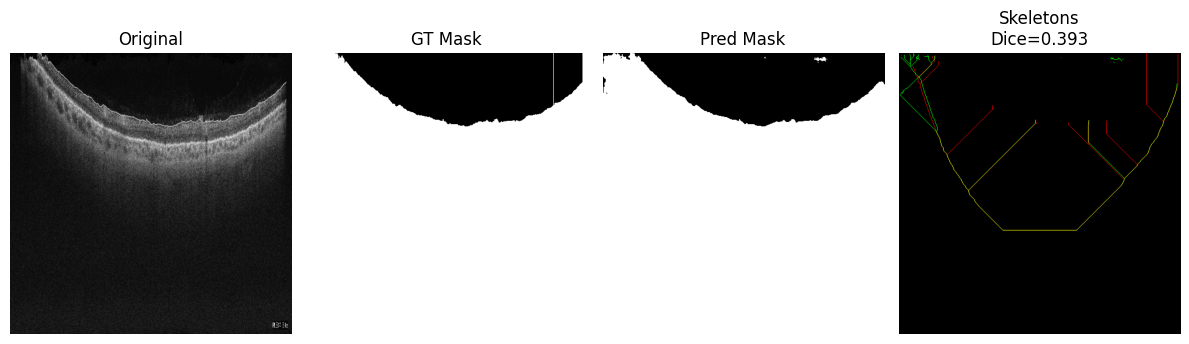

[Step 9] 推論・細線化・評価・可視化が完了しました。


In [ ]:
# ================================
# Step 9: 推論・細線化・評価・可視化を一気に実行
# ================================

# 必要なら一度だけ:
# !pip install scikit-image

import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# ---------- 0. モデル読み込み ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# UNetは前のセルで定義済み前提
model = UNet(n_channels=1, n_classes=1).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/nv_detection_project/models/u-net.pth", map_location=device))
model.to(device)
model.eval()

# ---------- 1. ヘルパー関数 ----------
def to_numpy_image(tensor_img):
    """
    tensor_img: (1, 1, H, W) or (1, H, W) or (H, W) -> (H, W) の 0/1 numpy
    """
    if tensor_img.ndim == 4:
        # (N, C, H, W) を想定 → 先頭だけ
        tensor_img = tensor_img[0, 0]
    elif tensor_img.ndim == 3:
        # (C, H, W) → 先頭チャネル
        tensor_img = tensor_img[0]
    # detach → cpu → numpy → 0/1化
    arr = tensor_img.detach().cpu().numpy()
    arr = (arr > 0.5).astype(np.uint8)
    return arr

def skeletonize_mask(binary_np):
    """
    binary_np: (H, W) の 0/1 numpy → 細線化された 0/1 numpy
    """
    skel = skeletonize(binary_np.astype(bool))
    skel = skel.astype(np.uint8)
    return skel

def dice_coef_np(pred_np, true_np, eps=1e-7):
    """
    pred_np, true_np: (H, W) 0/1 numpy
    """
    pred_flat = pred_np.reshape(-1)
    true_flat = true_np.reshape(-1)

    intersection = (pred_flat * true_flat).sum()
    union = pred_flat.sum() + true_flat.sum()
    dice = (2.0 * intersection + eps) / (union + eps)
    return dice

# ---------- 2. Val全体でスケルトンDiceを計算 ----------
dice_list = []

model.eval()
with torch.no_grad():
    for images, masks in val_loader:
        images = images.to(device)   # (N, 1, H, W)
        masks  = masks.to(device)   # (N, 1, H, W)

        logits = model(images)                      # (N, 1, H, W)
        probs  = torch.sigmoid(logits)
        preds_bin = (probs > 0.5).float()           # 太線の予測マスク

        batch_size = images.size(0)

        for i in range(batch_size):
            # GTと予測を 0/1 numpy に変換
            gt_np    = to_numpy_image(masks[i:i+1])
            pred_np  = to_numpy_image(preds_bin[i:i+1])

            # 細線化
            gt_skel    = skeletonize_mask(gt_np)
            pred_skel  = skeletonize_mask(pred_np)

            # Dice (スケルトン同士)
            d = dice_coef_np(pred_skel, gt_skel)
            dice_list.append(d)

mean_dice = float(np.mean(dice_list)) if dice_list else 0.0
print(f"[Step 9] Skeleton Dice on Val = {mean_dice:.4f}")

# ---------- 3. 何枚か可視化 ----------
num_visualize = 5  # 表示したい枚数

shown = 0
model.eval()
with torch.no_grad():
    for images, masks in val_loader:
        images = images.to(device)
        masks  = masks.to(device)

        logits = model(images)
        probs  = torch.sigmoid(logits)
        preds_bin = (probs > 0.5).float()

        batch_size = images.size(0)

        for i in range(batch_size):
            if shown >= num_visualize:
                break

            # 元画像・GT・予測を取得
            img_np   = images[i, 0].detach().cpu().numpy()
            gt_np    = to_numpy_image(masks[i:i+1])
            pred_np  = to_numpy_image(preds_bin[i:i+1])

            gt_skel    = skeletonize_mask(gt_np)
            pred_skel  = skeletonize_mask(pred_np)

            d_single = dice_coef_np(pred_skel, gt_skel)

            # --- 可視化（4枚並べる） ---
            plt.figure(figsize=(12, 4))

            # 1. 元画像
            plt.subplot(1, 4, 1)
            plt.imshow(img_np, cmap="gray")
            plt.title("Original")
            plt.axis("off")

            # 2. GTマスク（太線）
            plt.subplot(1, 4, 2)
            plt.imshow(gt_np, cmap="gray")
            plt.title("GT Mask")
            plt.axis("off")

            # 3. 予測マスク（太線）
            plt.subplot(1, 4, 3)
            plt.imshow(pred_np, cmap="gray")
            plt.title("Pred Mask")
            plt.axis("off")

            # 4. スケルトン比較（GT: 赤, Pred: 緑）
            overlay = np.zeros((gt_np.shape[0], gt_np.shape[1], 3), dtype=np.float32)
            overlay[..., 0] = gt_skel        # 赤
            overlay[..., 1] = pred_skel      # 緑

            plt.subplot(1, 4, 4)
            plt.imshow(overlay)
            plt.title(f"Skeletons\nDice={d_single:.3f}")
            plt.axis("off")

            plt.tight_layout()
            plt.show()

            shown += 1

        if shown >= num_visualize:
            break

print("[Step 9] 推論・細線化・評価・可視化が完了しました。")


In [ ]:
# ============================================
# Step 9: 推論・細線化・可視化（元画像 + GT黄ライン + Pred赤ライン）
# ============================================

# 必要なら一度だけ:
# !pip install scikit-image

import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# ---------- 0. モデル読み込み ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# UNet, val_loader は定義済み前提
model = UNet(n_channels=1, n_classes=1).to(device)
model.load_state_dict(torch.load(
    "/content/drive/MyDrive/nv_detection_project/models/u-net.pth",
    map_location=device
))
model.to(device)
model.eval()

# ---------- 1. ヘルパー関数 ----------

def to_binary_numpy(tensor_img, thr=0.5):
    """
    tensor_img: (1, 1, H, W) or (1, H, W) or (H, W)
    -> (H, W) の 0/1 numpy
    """
    if tensor_img.ndim == 4:
        tensor_img = tensor_img[0, 0]  # (N,C,H,W) → 先頭
    elif tensor_img.ndim == 3:
        tensor_img = tensor_img[0]     # (C,H,W) → 先頭チャネル

    arr = tensor_img.detach().cpu().numpy()
    arr = (arr > thr).astype(np.uint8)
    return arr

def skeletonize_mask(binary_np):
    """
    binary_np: (H, W) 0/1 numpy → 細線化された 0/1 numpy
    """
    skel = skeletonize(binary_np.astype(bool))
    return skel.astype(np.uint8)

def overlay_lines_on_image(img_np, gt_skel, pred_skel):
    """
    img_np: (H, W) 元画像
    gt_skel, pred_skel: (H, W) 0/1 (細線化ライン)

    戻り値: (H, W, 3) RGB画像
      - 背景: 元画像グレースケール
      - 正解ライン: 黄 (R=1, G=1, B=0)
      - 推論ライン: 赤 (R=1, G=0, B=0)
    """
    img = img_np.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)

    h, w = img.shape
    overlay = np.stack([img, img, img], axis=-1)  # (H, W, 3)


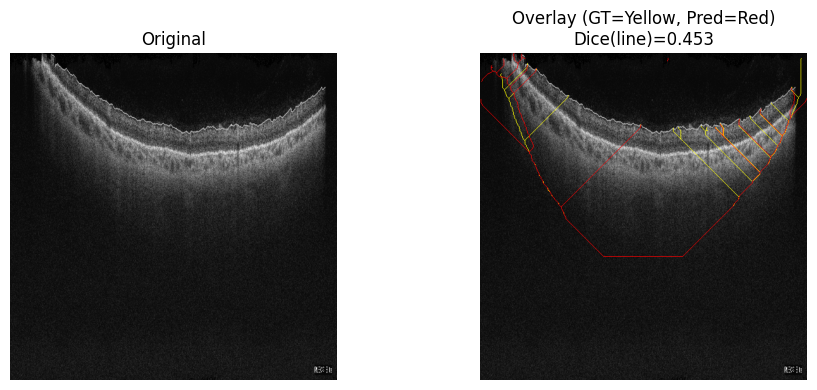

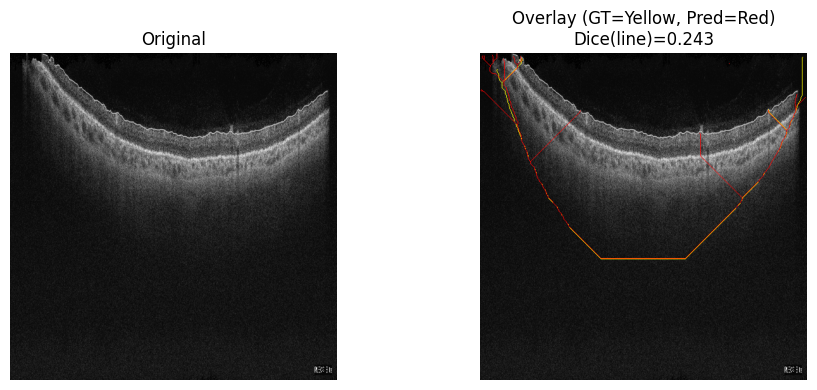

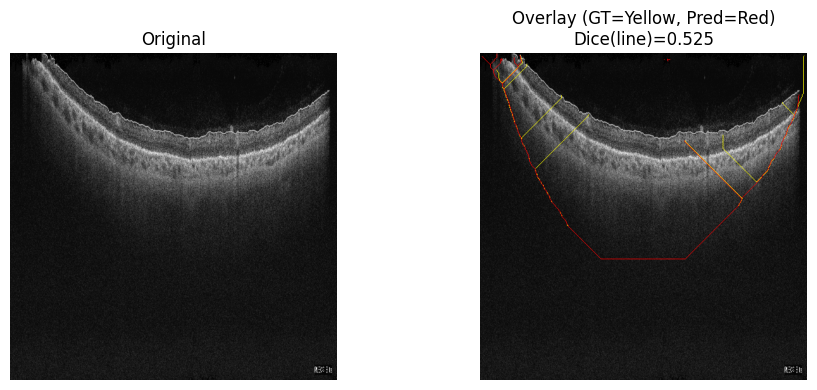

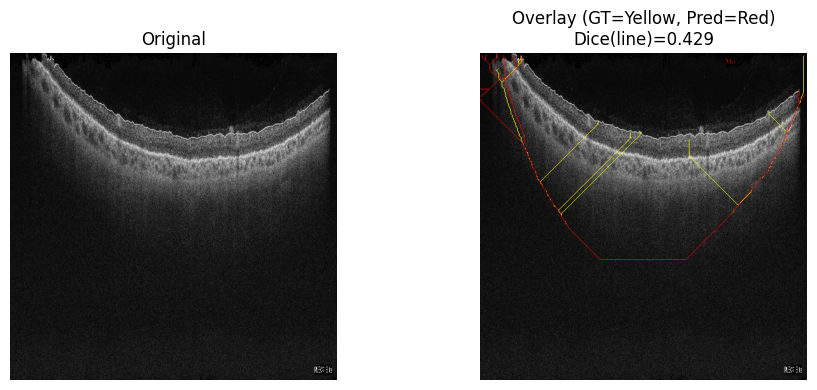

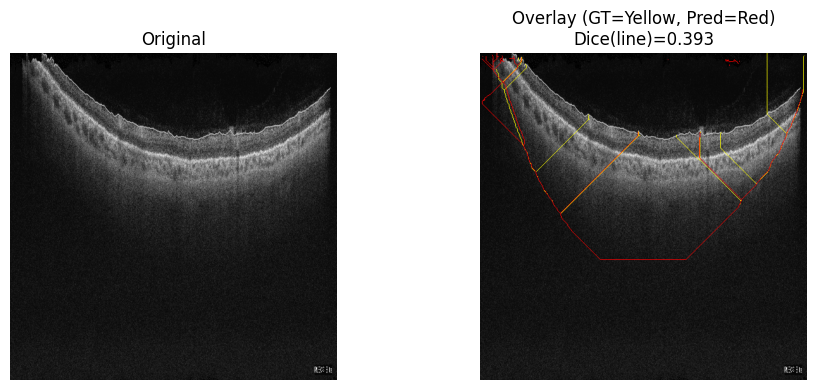

[Step 9] Skeleton Dice (Val mean) = 0.3930


In [ ]:
# ============================================
# Step 9: 推論・細線化・可視化（元画像 + GT黄ライン + Pred赤ライン）
# ============================================

# 必要なら一度だけ:
# !pip install scikit-image

import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# ---------- 0. モデル読み込み ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# UNet, val_loader は定義済み前提
model = UNet(n_channels=1, n_classes=1).to(device)
model.load_state_dict(torch.load(
    "/content/drive/MyDrive/nv_detection_project/models/u-net.pth",
    map_location=device
))
model.to(device)
model.eval()

# ---------- 1. ヘルパー関数 ----------

def to_binary_numpy(tensor_img, thr=0.5):
    """
    tensor_img: (1, 1, H, W) or (1, H, W) or (H, W)
    -> (H, W) の 0/1 numpy
    """
    if tensor_img.ndim == 4:
        tensor_img = tensor_img[0, 0]  # (N,C,H,W) → 先頭
    elif tensor_img.ndim == 3:
        tensor_img = tensor_img[0]     # (C,H,W) → 先頭チャネル

    arr = tensor_img.detach().cpu().numpy()
    arr = (arr > thr).astype(np.uint8)
    return arr

def skeletonize_mask(binary_np):
    """
    binary_np: (H, W) 0/1 numpy → 細線化された 0/1 numpy
    """
    skel = skeletonize(binary_np.astype(bool))
    return skel.astype(np.uint8)

def overlay_lines_on_image(img_np, gt_skel, pred_skel):
    """
    img_np: (H, W) 元画像
    gt_skel, pred_skel: (H, W) 0/1 (細線化ライン)

    戻り値: (H, W, 3) RGB画像
      - 背景: 元画像グレースケール
      - 正解ライン: 黄 (R=1, G=1, B=0)
      - 推論ライン: 赤 (R=1, G=0, B=0)
    """
    img = img_np.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)

    h, w = img.shape
    overlay = np.stack([img, img, img], axis=-1)  # (H, W, 3)

    gt_bool   = gt_skel.astype(bool)
    pred_bool = pred_skel.astype(bool)

    # まず正解ラインを黄色で塗る
    overlay[gt_bool] = [1.0, 1.0, 0.0]   # Yellow

    # その上から推論ラインを赤で上書き
    overlay[pred_bool] = [1.0, 0.0, 0.0] # Red

    return overlay

# （オプション）スケルトンDiceを計算する関数
def dice_coef_np(pred_np, true_np, eps=1e-7):
    pred_flat = pred_np.reshape(-1)
    true_flat = true_np.reshape(-1)
    intersection = (pred_flat * true_flat).sum()
    union = pred_flat.sum() + true_flat.sum()
    dice = (2.0 * intersection + eps) / (union + eps)
    return float(dice)

# ---------- 2. Valデータで推論 + 細線化 + 重ね可視化 ----------

num_visualize = 5   # 重ね表示する枚数（新生血管の症例を含むバッチで見る）
shown = 0
dice_list = []

model.eval()
with torch.no_grad():
    for images, masks in val_loader:
        images = images.to(device)   # (N, 1, H, W)
        masks  = masks.to(device)    # (N, 1, H, W)

        # 推論
        logits = model(images)                        # (N, 1, H, W)
        probs  = torch.sigmoid(logits)               # 確率マップ
        preds_bin = (probs > 0.5).float()            # 閾値0.5で二値化

        batch_size = images.size(0)

        for i in range(batch_size):
            # 元画像
            img_np = images[i, 0].detach().cpu().numpy()       # (H, W)

            # GT & 推論マスク（太線）
            gt_mask   = to_binary_numpy(masks[i:i+1])          # (H, W)
            pred_mask = to_binary_numpy(preds_bin[i:i+1])      # (H, W)

            # 細線化してライン化
            gt_skel   = skeletonize_mask(gt_mask)
            pred_skel = skeletonize_mask(pred_mask)

            # （オプション）スケルトンDice
            dice = dice_coef_np(pred_skel, gt_skel)
            dice_list.append(dice)

            # オーバーレイ画像作成（元画像 + GT黄ライン + Pred赤ライン）
            overlay = overlay_lines_on_image(img_np, gt_skel, pred_skel)

            if shown < num_visualize:
                plt.figure(figsize=(10, 4))

                # 左：元画像
                plt.subplot(1, 2, 1)
                plt.imshow(img_np, cmap="gray")
                plt.title("Original")
                plt.axis("off")

                # 右：オーバーレイ
                plt.subplot(1, 2, 2)
                plt.imshow(overlay)
                plt.title(f"Overlay (GT=Yellow, Pred=Red)\nDice(line)={dice:.3f}")
                plt.axis("off")

                plt.tight_layout()
                plt.show()

                shown += 1

        if shown >= num_visualize:
            break

if dice_list:
    print(f"[Step 9] Skeleton Dice (Val mean) = {np.mean(dice_list):.4f}")
else:
    print("[Step 9] ValデータからDiceを計算できませんでした。")


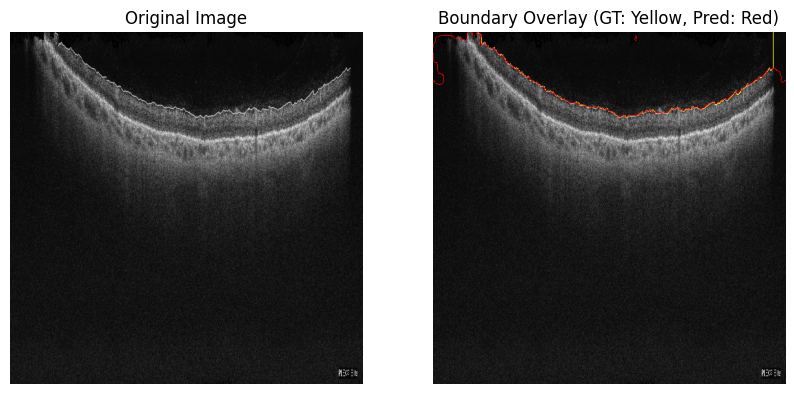

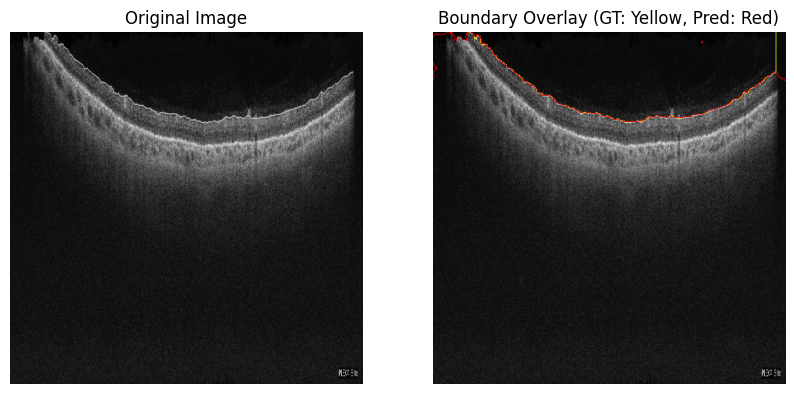

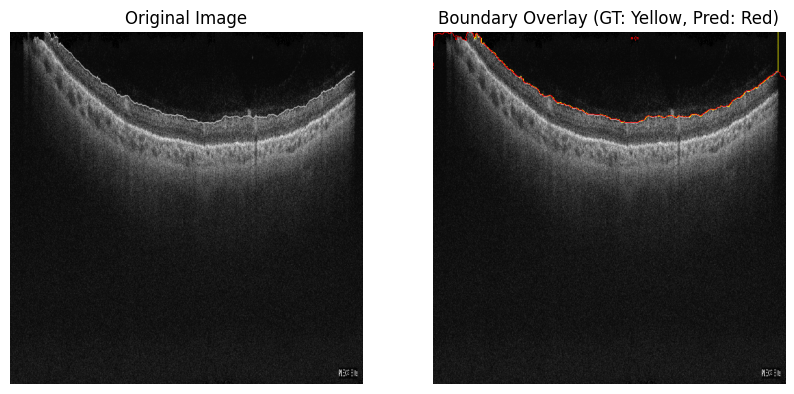

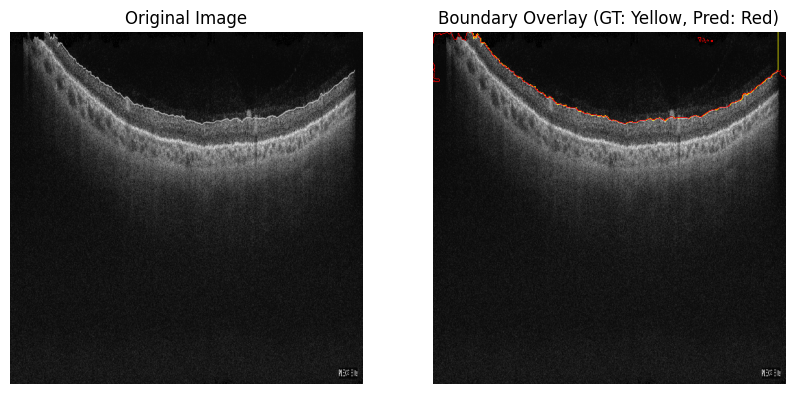

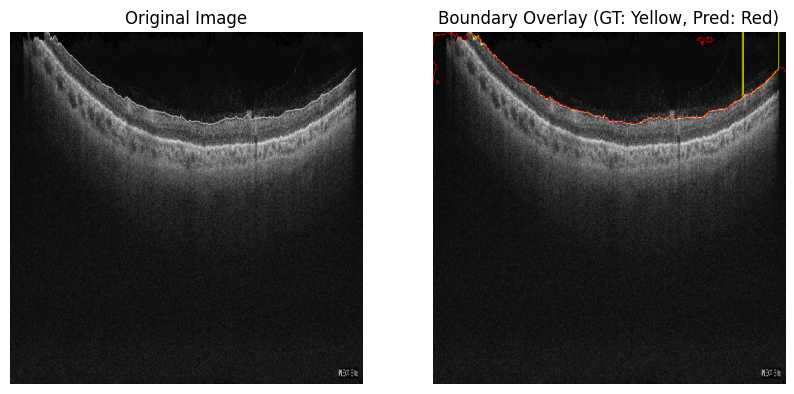

In [ ]:
# ============================================
# マスク境界ラインを抽出して、
# 正解ライン=黄、推論ライン=赤 で重ねて可視化
# ============================================

import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ---------- 0. モデル読み込み ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_channels=1, n_classes=1).to(device)
model.load_state_dict(torch.load(
    "/content/drive/MyDrive/nv_detection_project/models/u-net.pth",
    map_location=device
))
model.eval()

# ---------- 1. 関数 ----------
def mask_to_boundary(mask_np):
    """
    mask_np: (H, W) 0/1 numpy
    → mask境界 (H, W) 0/1 numpy
    """
    mask_uint8 = (mask_np * 255).astype(np.uint8)
    edges = cv2.Canny(mask_uint8, 50, 150)  # 境界線(白=255)
    return (edges > 0).astype(np.uint8)     # 0/1に戻す

def overlay_boundary(img_np, gt_edge, pred_edge):
    """
    img_np:   (H, W) 元画像
    gt_edge:  (H, W) 0/1 正解境界
    pred_edge:(H, W) 0/1 推論境界
    → Gray背景 + 黄線(GT) + 赤線(Pred)
    """
    img = img_np.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    overlay = np.stack([img, img, img], axis=-1)

    overlay[gt_edge.astype(bool)]  = [1.0, 1.0, 0.0]  # Yellow
    overlay[pred_edge.astype(bool)] = [1.0, 0.0, 0.0]  # Red

    return overlay

# ---------- 2. Valデータ処理 ----------
num_visualize = 5
shown = 0

with torch.no_grad():
    for images, masks in val_loader:
        images = images.to(device)
        masks  = masks.to(device)

        logits = model(images)
        probs = torch.sigmoid(logits)
        pred_bin = (probs > 0.5).float()

        for i in range(images.size(0)):
            if shown >= num_visualize:
                break

            img_np = images[i, 0].cpu().numpy()

            gt_np   = (masks[i, 0].cpu().numpy()   > 0.5).astype(np.uint8)
            pred_np = (pred_bin[i, 0].cpu().numpy() > 0.5).astype(np.uint8)

            # --- ここが境界抽出 ---
            gt_edge   = mask_to_boundary(gt_np)       # Yellow
            pred_edge = mask_to_boundary(pred_np)

            # オーバーレイ画像の作成と表示
            overlay = overlay_boundary(img_np, gt_edge, pred_edge)

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(img_np, cmap='gray')
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(overlay)
            plt.title('Boundary Overlay (GT: Yellow, Pred: Red)')
            plt.axis('off')
            plt.show()

            shown += 1

        if shown >= num_visualize:
            break
